In [3]:

import librosa
audio_path = 'C:/Users/Admin/Desktop/Biz/Voice/Mono/Sanat1.wav'

x, sr = librosa.load(audio_path)
#Plot the signal:
#plt.figure(figsize=(14, 5))
#librosa.display.waveplot(x, sr=sr)

mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

print(mfccs[0])
#Displaying  the MFCCs:
#librosa.display.specshow(mfccs, sr=sr, x_axis='time')

(20, 862)
[-595.32196  -391.40594  -318.05234  -323.85797  -323.99655  -339.47565
 -367.82837  -369.7001   -406.95288  -427.79907  -430.5847   -412.7015
 -413.2816   -437.5488   -438.415    -433.7002   -429.19904  -432.38348
 -417.1852   -412.2588   -415.87933  -418.10352  -417.55545  -422.9521
 -429.5369   -429.35443  -431.9557   -431.17053  -430.99893  -408.9311
 -360.90308  -298.90292  -251.80835  -234.68263  -229.30511  -213.40096
 -185.24078  -202.11717  -239.25584  -181.78017  -125.84662  -127.60179
 -170.97432  -160.15463  -179.40167  -201.00255  -224.84709  -262.1692
 -295.96207  -312.81082  -323.7242   -331.46228  -297.2135   -232.30931
 -208.40634  -207.926    -222.28618  -239.10104  -249.8354   -267.5395
 -272.12936  -268.79974  -265.31406  -285.84924  -300.91043  -321.2012
 -353.37854  -391.29373  -412.4253   -388.85645  -394.48972  -413.3727
 -417.0865   -405.0288   -400.18954  -413.96182  -386.7067   -301.8034
 -237.2931   -213.74168  -217.63899  -250.32469  -292.20438  -

In [3]:
# import things we're going to need


from python_speech_features import mfcc

from python_speech_features import logfbank

import scipy.io.wavfile as wav

import numpy

import os



# directory where we your .wav files are

directoryName = "C:/Users/Admin/Desktop/Biz/Voice/Mono/Sanat1.wav" # put your own directory here

# directory to put our results in, you can change the name if you like

resultsDirectory = directoryName + "/MFCCresults"



# make a new folder in this directory to save our results in

if not os.path.exists(resultsDirectory):

    os.makedirs(resultsDirectory)



# get MFCCs for every .wav file in our specified directory 

for filename in os.listdir(directoryName):

    if filename.endswith('.wav'): # only get MFCCs from .wavs

        # read in our file

        (rate,sig) = wav.read(directoryName + "/" +filename)



        # get mfcc

        mfcc_feat = mfcc(sig,rate)



        # get filterbank energies

        fbank_feat = logfbank(sig,rate)



        # create a file to save our results in

        outputFile = resultsDirectory + "/" + os.path.splitext(filename)[0] + ".csv"

        file = open(outputFile, 'w+') # make file/over write existing file

        numpy.savetxt(file, fbank_feat, delimiter=",") #save MFCCs as .csv

        file.close() # close file

In [ ]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
TRAIN_PATH = 'C:/Users/Admin/Desktop/Biz/Voice/'
ipd.Audio(TRAIN_PATH + "sanat_mono.wav")



In [17]:
sample_rate, audio = wavfile.read(TRAIN_PATH + "sanat_mono.wav")
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 16000Hz
Audio duration: 4.4559375s


In [18]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

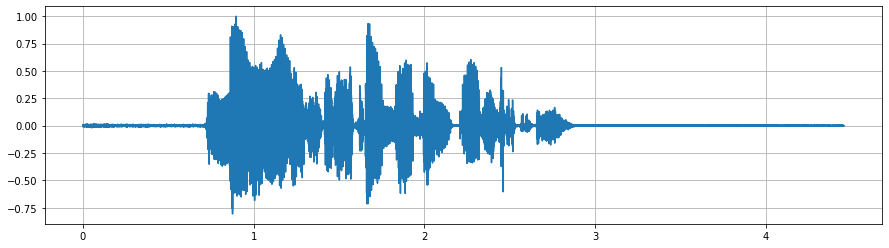

In [19]:
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

In [20]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [22]:
hop_size = 15 #ms
FFT_size = 2048

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

Framed audio shape: (298, 2048)


In [23]:
print("First frame:")
audio_framed[1]

First frame:


array([0.00443357, 0.0067268 , 0.0046629 , ..., 0.00175814, 0.00458645,
       0.00359272])

In [24]:
print("Last frame:")
audio_framed[-1]

Last frame:


array([-0.00122305, -0.00160526, -0.0016817 , ..., -0.00030576,
       -0.00068797, -0.00145238])

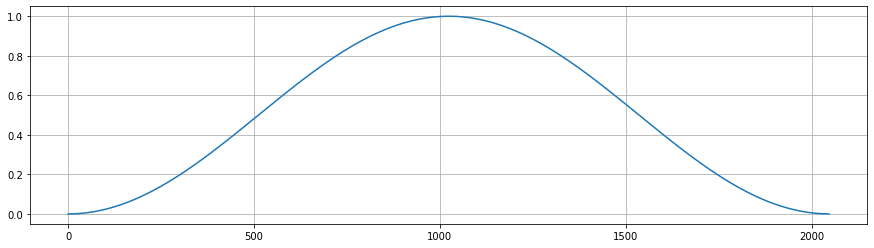

In [25]:
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)

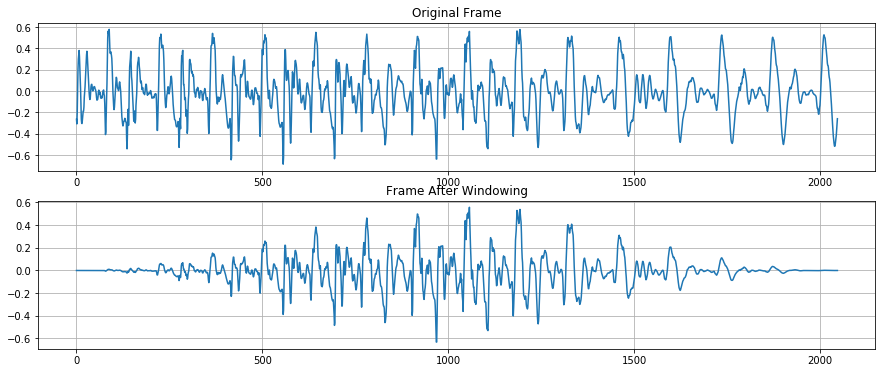

In [26]:
audio_win = audio_framed * window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

In [27]:
audio_winT = np.transpose(audio_win)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

In [28]:
audio_power = np.square(np.abs(audio_fft))
print(audio_power.shape)

(298, 1025)


In [29]:
freq_min = 0
freq_high = sample_rate / 2
mel_filter_num = 10

print("Minimum frequency: {0}".format(freq_min))
print("Maximum frequency: {0}".format(freq_high))

Minimum frequency: 0
Maximum frequency: 8000.0


In [31]:
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)

In [32]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=44100):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    
    print("MEL min: {0}".format(fmin_mel))
    print("MEL max: {0}".format(fmax_mel))
    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = met_to_freq(mels)
    
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs

In [33]:
filter_points, mel_freqs = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sample_rate=44100)
filter_points

MEL min: 0.0
MEL max: 2840.023046708319


array([  0,   8,  18,  32,  48,  69,  96, 129, 170, 223, 288, 371])

In [34]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

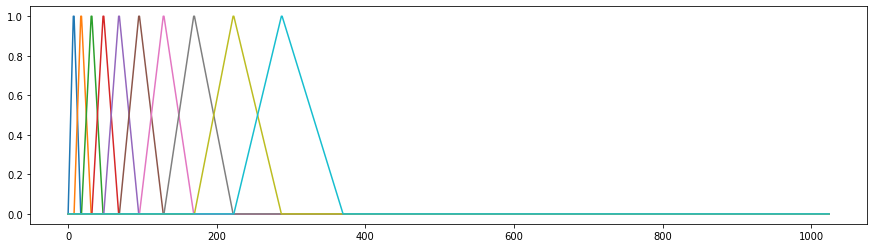

In [35]:
filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [36]:
# taken from the librosa library
enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]

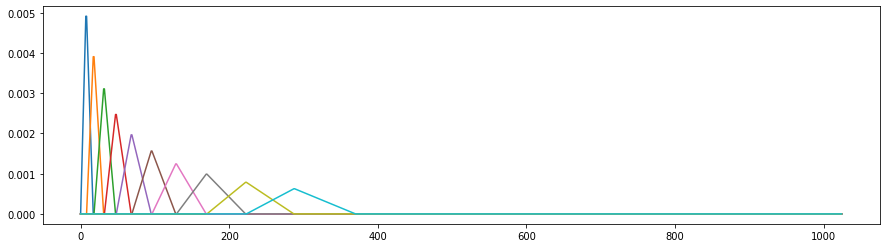

In [37]:
plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [38]:
audio_filtered = np.dot(filters, np.transpose(audio_power))
audio_log = 10.0 * np.log10(audio_filtered)
audio_log.shape

(10, 298)

In [39]:
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis

In [40]:
dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents = np.dot(dct_filters, audio_log)
cepstral_coefficents.shape

(40, 298)

In [41]:
cepstral_coefficents[:, 0]

array([-8.81910779e+01,  2.14577778e+01, -9.38406222e-01, -8.39722178e+00,
       -5.31630014e+00, -1.00761550e+00, -1.42859501e-02, -5.41230188e-01,
       -3.57379789e+00, -1.14573917e+00,  1.48345570e-13,  1.14573917e+00,
        3.57379789e+00,  5.41230188e-01,  1.42859501e-02,  1.00761550e+00,
        5.31630014e+00,  8.39722178e+00,  9.38406222e-01, -2.14577778e+01,
        1.24721018e+02, -2.14577778e+01,  9.38406222e-01,  8.39722178e+00,
        5.31630014e+00,  1.00761550e+00,  1.42859501e-02,  5.41230188e-01,
        3.57379789e+00,  1.14573917e+00, -6.16965798e-14, -1.14573917e+00,
       -3.57379789e+00, -5.41230188e-01, -1.42859501e-02, -1.00761550e+00,
       -5.31630014e+00, -8.39722178e+00, -9.38406222e-01,  2.14577778e+01])

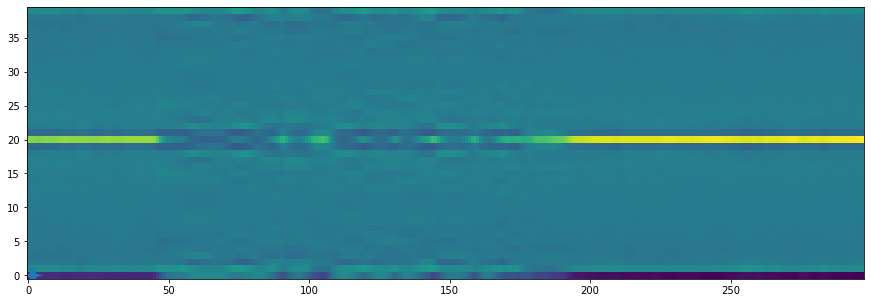

In [42]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.imshow(cepstral_coefficents, aspect='auto', origin='lower');